# OwlViT test

In [14]:
import sys
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

current_dir = os.getcwd()
# Navigate up one directory to get the correct path
sys.path.insert(0, os.path.abspath(os.path.join(current_dir, "..","..", "src")))

from detection_module.owlv2 import Owlv2
from detection_module.utils import calculate_iou, show_images


## Image Visualization

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2400x1600 at 0x129878100>


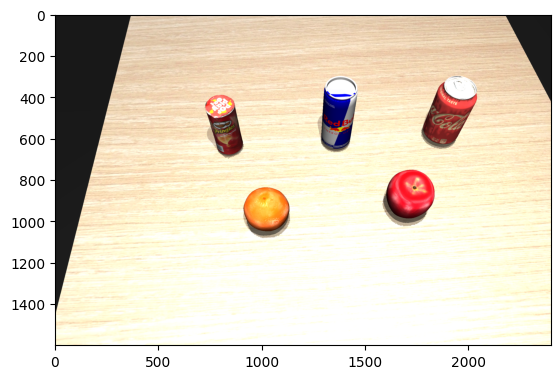

In [20]:
img_path = "../output.png"
image = Image.open(img_path)
plt.imshow(image)

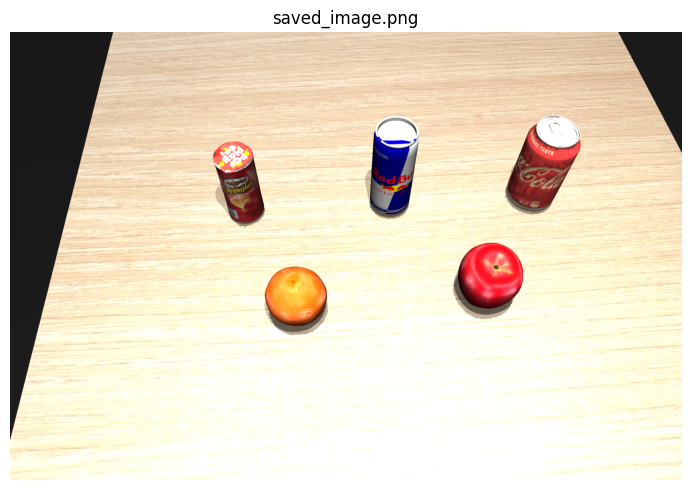

In [21]:
image_dir = "../image/output.png"
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
image_paths = sorted(image_paths)
images = [Image.open(img).convert("RGB") for img in image_paths]
titles = [os.path.basename(img_path) for img_path in image_paths]

# Show images using the utility function
show_images(images, titles)

## Owlv2 Inferenece

Let's define sample image dict first

In [22]:
sample = {
        'image': images[0],
        'text': ["a Red Bull can", "a Pringles can", "a Coca-Cola can", "a Monster can", "an orange", "an apple"],
    }

In [23]:
# load model 
owlvit = Owlv2()
sample['box_threshold'] = 0.3
result = owlvit.detect_objects(**sample)[0]

a Coca-Cola can [1776  295 2040  639]
a Red Bull can [1258  299 1432  659]
a Pringles can [725 387 909 682]
an apple [1605  750 1837  989]
an orange [ 914  836 1133 1049]


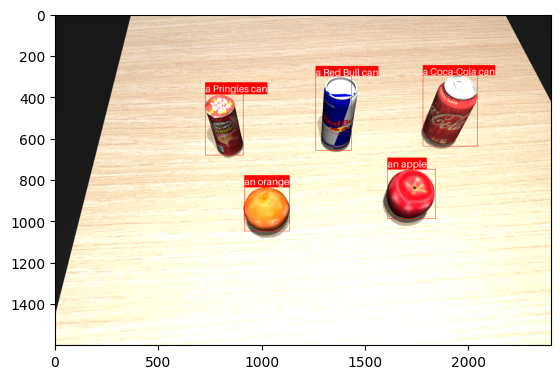

In [9]:

img = sample['image']
boxes = result['boxes']
labels = [sample['text'][idx] for idx in result['labels'].tolist()]
boxes_list = np.array(result['boxes'].tolist())
boxes_list = boxes_list.astype(int)
for label,box in zip(labels,boxes_list):
    print(label,box)
img_boxed = owlvit.draw_boxes(img, boxes, labels)
plt.imshow(img)